Fixed Points: [(0, 0), (2, 0), (3, -1), (-1, 3)]


C:\Users\cw171001\AppData\Local\Temp\ipykernel_79072\1736969389.py:62: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(system, initial_state, t)


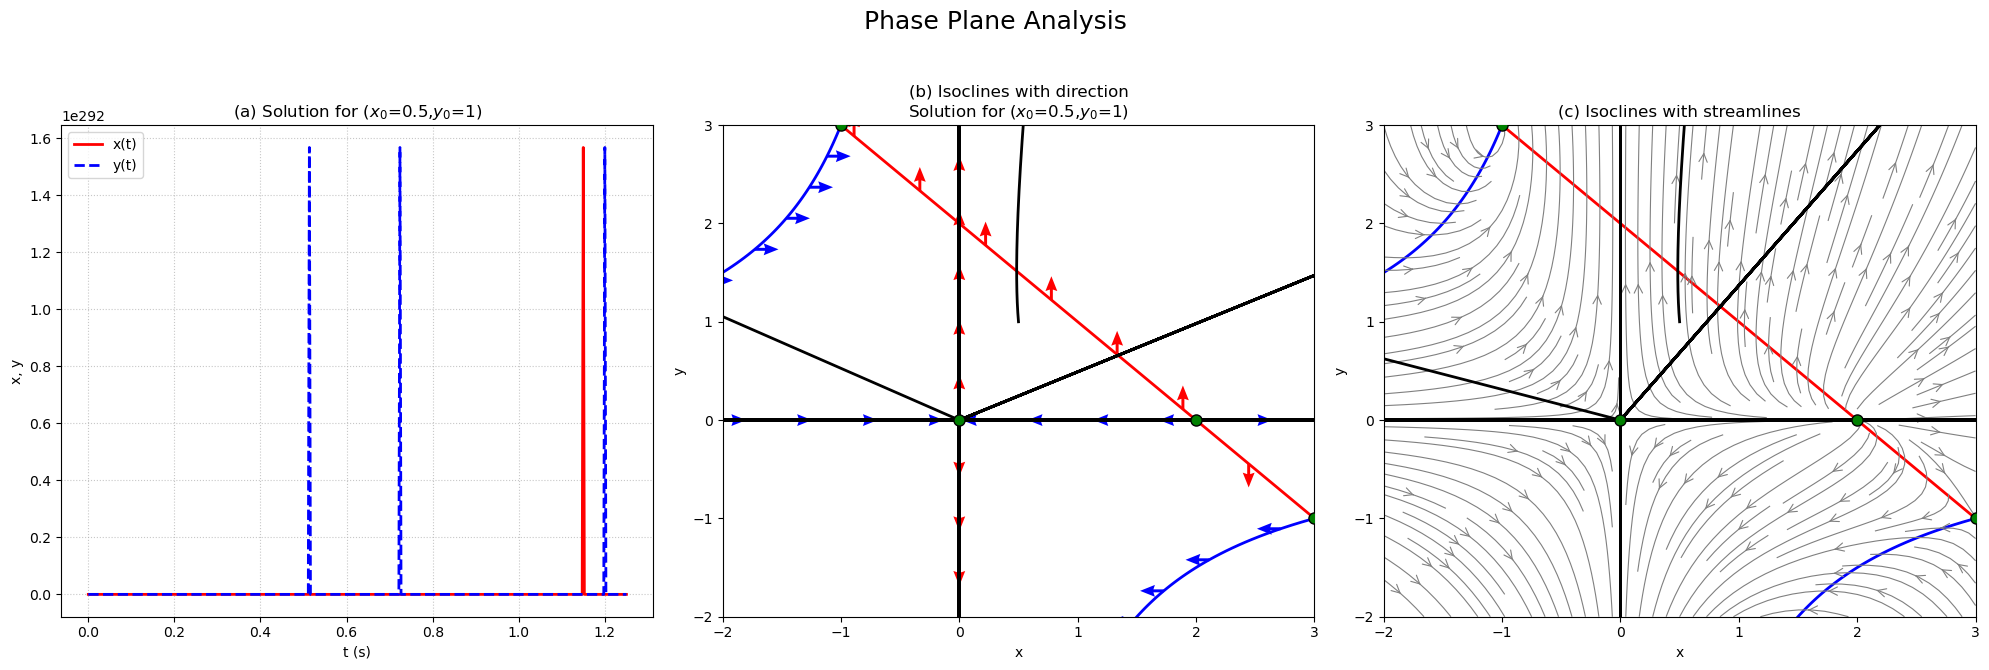

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Define the ODEs ---
def f(x, y):
    return x**2 + x*y - 2*x

def g(x, y):
    return x*y**2 + 3*y

# --- System of ODEs for odeint ---
def system(state, t):
    x, y = state
    dxdt = f(x, y)
    dydt = g(x, y)
    return [dxdt, dydt]

# --- Calculate Fixed Points (Nullcline Intersections) ---
# From dx/dt = x(x + y - 2) = 0  => x=0 or y=2-x
# From dy/dt = y(xy + 3) = 0    => y=0 or x=-3/y

# Case 1: x=0 and y=0  => (0,0)
fixed_points = [(0, 0)]

# Case 2: x=0 and x=-3/y  => 0 = -3/y (impossible)

# Case 3: y=2-x and y=0  => 0 = 2-x => x=2 => (2,0)
fixed_points.append((2, 0))

# Case 4: y=2-x and x=-3/y
# Substitute y=2-x into x=-3/y:
# x = -3/(2-x)
# x(2-x) = -3
# 2x - x^2 = -3
# x^2 - 2x - 3 = 0
# (x-3)(x+1) = 0
# x = 3 or x = -1

# If x=3, then y=2-3=-1 => (3,-1)
fixed_points.append((3, -1))

# If x=-1, then y=2-(-1)=3 => (-1,3)
fixed_points.append((-1, 3))

print("Fixed Points:", fixed_points)


# --- Plotting Setup ---
fig, axes = plt.subplots(1, 3, figsize=(20, 7)) # One row, three columns
fig.suptitle('Phase Plane Analysis', fontsize=18)

# Initial conditions for the solution trajectory
x0 = 0.5
y0 = 1
initial_state = [x0, y0]

# Time points for solving the ODEs
t = np.linspace(0, 1.25, 500) # Adjust t_end for how long you want to plot the solution

# Solve the ODEs
solution = odeint(system, initial_state, t)
x_sol = solution[:, 0]
y_sol = solution[:, 1]


# --- Subplot (a): Solution for x(t) and y(t) ---
ax = axes[0]
ax.plot(t, x_sol, 'r-', label='x(t)', linewidth=2)
ax.plot(t, y_sol, 'b--', label='y(t)', linewidth=2)
ax.set_title(f'(a) Solution for ($x_0$={x0},$y_0$={y0})')
ax.set_xlabel('t (s)')
ax.set_ylabel('x, y')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)


# --- Common Grid for Phase Plane Plots (b) and (c) ---
coords = np.linspace(-2, 3, 40) # Slightly adjust range for better visuals
X, Y = np.meshgrid(coords, coords)
dxdt_grid = f(X, Y)
dydt_grid = g(X, Y)

# Normalize vectors for quiver plot
magnitude = np.hypot(dxdt_grid, dydt_grid)
magnitude[magnitude == 0] = 1.0 # Avoid division by zero
dxdt_n = dxdt_grid / magnitude
dydt_n = dydt_grid / magnitude

# Nullcline calculations (using coords for the range)
# dx/dt = 0 => x=0 or y=2-x
y_null_1 = 2 - coords

# dy/dt = 0 => y=0 or x=-3/y
y_null_2_pos = np.linspace(0.1, 3, 100) # For y > 0
x_null_2_pos = -3 / y_null_2_pos
y_null_2_neg = np.linspace(-3, -0.1, 100) # For y < 0
x_null_2_neg = -3 / y_null_2_neg


# --- Subplot (b): Isoclines with direction (Quiver on nullclines) ---
ax = axes[1]
ax.set_title(f'(b) Isoclines with direction\nSolution for ($x_0$={x0},$y_0$={y0})')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)

# Plot Nullclines
ax.axvline(0, color='red', linestyle='-', linewidth=2)
ax.plot(coords, y_null_1, 'r-', linewidth=2) # y = 2-x
ax.axhline(0, color='blue', linestyle='-', linewidth=2)
ax.plot(x_null_2_pos, y_null_2_pos, 'b-', linewidth=2) # x = -3/y (positive y)
ax.plot(x_null_2_neg, y_null_2_neg, 'b-', linewidth=2) # x = -3/y (negative y)

# Plot Quiver arrows *along* the nullclines
# We'll need to sample points directly on the nullclines
# dx/dt = 0 (red) arrows:
# Along x=0:
y_sample = np.linspace(-2, 3, 10)
x_sample_0 = np.zeros_like(y_sample)
dxdt_sample = f(x_sample_0, y_sample)
dydt_sample = g(x_sample_0, y_sample)
mag_sample = np.hypot(dxdt_sample, dydt_sample)
mag_sample[mag_sample == 0] = 1.0
ax.quiver(x_sample_0, y_sample, dxdt_sample/mag_sample, dydt_sample/mag_sample,
          color='red', scale=25, width=0.005, headwidth=4, headlength=5)

# Along y=2-x:
x_sample = np.linspace(-2, 3, 10)
y_sample = 2 - x_sample
dxdt_sample = f(x_sample, y_sample)
dydt_sample = g(x_sample, y_sample)
mag_sample = np.hypot(dxdt_sample, dydt_sample)
mag_sample[mag_sample == 0] = 1.0
ax.quiver(x_sample, y_sample, dxdt_sample/mag_sample, dydt_sample/mag_sample,
          color='red', scale=25, width=0.005, headwidth=4, headlength=5)

# dy/dt = 0 (blue) arrows:
# Along y=0:
x_sample = np.linspace(-2, 3, 10)
y_sample_0 = np.zeros_like(x_sample)
dxdt_sample = f(x_sample, y_sample_0)
dydt_sample = g(x_sample, y_sample_0)
mag_sample = np.hypot(dxdt_sample, dydt_sample)
mag_sample[mag_sample == 0] = 1.0
ax.quiver(x_sample, y_sample_0, dxdt_sample/mag_sample, dydt_sample/mag_sample,
          color='blue', scale=25, width=0.005, headwidth=4, headlength=5)

# Along x=-3/y:
# We need to handle this carefully as x_sample needs to be valid
y_sample = np.linspace(-3, 3, 20)
y_sample = y_sample[(y_sample > 0.1) | (y_sample < -0.1)] # Avoid division by zero
x_sample = -3 / y_sample
dxdt_sample = f(x_sample, y_sample)
dydt_sample = g(x_sample, y_sample)
mag_sample = np.hypot(dxdt_sample, dydt_sample)
mag_sample[mag_sample == 0] = 1.0
ax.quiver(x_sample, y_sample, dxdt_sample/mag_sample, dydt_sample/mag_sample,
          color='blue', scale=25, width=0.005, headwidth=4, headlength=5)


# Plot fixed points
for fx, fy in fixed_points:
    ax.plot(fx, fy, 'go', markersize=8, markeredgecolor='k', zorder=5) # Green circles

# Plot the solution trajectory (y vs x)
ax.plot(x_sol, y_sol, 'k-', linewidth=2, label=f'y(t) vs. x(t)')


# --- Subplot (c): Isoclines with streamlines ---
ax = axes[2]
ax.set_title(f'(c) Isoclines with streamlines')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)

# Plot Nullclines
ax.axvline(0, color='red', linestyle='-', linewidth=2)
ax.plot(coords, y_null_1, 'r-', linewidth=2) # y = 2-x
ax.axhline(0, color='blue', linestyle='-', linewidth=2)
ax.plot(x_null_2_pos, y_null_2_pos, 'b-', linewidth=2) # x = -3/y (positive y)
ax.plot(x_null_2_neg, y_null_2_neg, 'b-', linewidth=2) # x = -3/y (negative y)

# Plot streamlines for the entire field
ax.streamplot(X, Y, dxdt_grid, dydt_grid, color='gray', linewidth=0.8, density=1.5, arrowstyle='->', arrowsize=1.5)

# Plot fixed points
for fx, fy in fixed_points:
    ax.plot(fx, fy, 'go', markersize=8, markeredgecolor='k', zorder=5) # Green circles

# Plot the solution trajectory (y vs x)
ax.plot(x_sol, y_sol, 'k-', linewidth=2) # Only one trajectory shown in your example

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()